In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import preprocessing as pp
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [4]:
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [5]:
df = pd.read_csv("covidtest.csv")

In [6]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_6No_and_above,gender,test_indication
0,No,No,No,No,No,negative,No,male,Other
1,No,Yes,No,No,No,negative,No,male,Other
2,No,No,No,No,No,negative,Yes,female,Other
3,No,No,No,No,No,negative,No,male,Other
4,No,Yes,No,No,No,negative,No,male,Other


In [7]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_6No_and_above,gender,test_indication
count,44039,44039,44039,44039,44039,44039,44039,44039,44039
unique,2,2,2,2,2,2,2,2,3
top,No,No,No,No,No,negative,No,female,Other
freq,42996,43158,43794,43946,43660,39486,35689,22054,42961


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44039 entries, 0 to 44038
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cough                44039 non-null  object
 1   fever                44039 non-null  object
 2   sore_throat          44039 non-null  object
 3   shortness_of_breath  44039 non-null  object
 4   head_ache            44039 non-null  object
 5   corona_result        44039 non-null  object
 6   age_6No_and_above    44039 non-null  object
 7   gender               44039 non-null  object
 8   test_indication      44039 non-null  object
dtypes: object(9)
memory usage: 3.0+ MB


In [9]:
df = pd.DataFrame(df, index=None)
 
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

      cough fever sore_throat shortness_of_breath head_ache corona_result  \
0        No    No          No                  No        No      negative   
1        No   Yes          No                  No        No      negative   
2        No    No          No                  No        No      negative   
3        No    No          No                  No        No      negative   
4        No   Yes          No                  No        No      negative   
...     ...   ...         ...                 ...       ...           ...   
44034    No    No          No                  No        No      positive   
44035    No    No          No                  No        No      positive   
44036    No    No          No                  No        No      positive   
44037    No    No          No                  No        No      positive   
44038    No    No          No                  No        No      positive   

      age_6No_and_above  gender test_indication  
0                    No  

In [10]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_6No_and_above', 'gender', 'test_indication'],
      dtype='object')

In [11]:
df.dropna(how='all')

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_6No_and_above,gender,test_indication
0,No,No,No,No,No,negative,No,male,Other
1,No,Yes,No,No,No,negative,No,male,Other
2,No,No,No,No,No,negative,Yes,female,Other
3,No,No,No,No,No,negative,No,male,Other
4,No,Yes,No,No,No,negative,No,male,Other
...,...,...,...,...,...,...,...,...,...
44034,No,No,No,No,No,positive,No,female,Other
44035,No,No,No,No,No,positive,No,female,Other
44036,No,No,No,No,No,positive,No,female,Other
44037,No,No,No,No,No,positive,No,male,Other


In [12]:
df['cough'].value_counts()

No     42996
Yes     1043
Name: cough, dtype: int64

In [13]:
df['fever'].value_counts()

No     43158
Yes      881
Name: fever, dtype: int64

In [14]:
df['sore_throat'].value_counts()

No     43794
Yes      245
Name: sore_throat, dtype: int64

In [15]:
label_encoder = pp.LabelEncoder()
df["corona_result"] = label_encoder.fit_transform(df["corona_result"])
df['corona_result']

0        0
1        0
2        0
3        0
4        0
        ..
44034    1
44035    1
44036    1
44037    1
44038    1
Name: corona_result, Length: 44039, dtype: int32

In [16]:
df["cough"] = label_encoder.fit_transform(df["cough"])
df['cough']

0        0
1        0
2        0
3        0
4        0
        ..
44034    0
44035    0
44036    0
44037    0
44038    0
Name: cough, Length: 44039, dtype: int32

In [17]:
df['cough'].value_counts()

0    42996
1     1043
Name: cough, dtype: int64

In [18]:
df["fever"] = label_encoder.fit_transform(df["fever"])
df['fever']

0        0
1        1
2        0
3        0
4        1
        ..
44034    0
44035    0
44036    0
44037    0
44038    0
Name: fever, Length: 44039, dtype: int32

In [19]:
df["sore_throat"] = label_encoder.fit_transform(df["sore_throat"])
df['sore_throat']

0        0
1        0
2        0
3        0
4        0
        ..
44034    0
44035    0
44036    0
44037    0
44038    0
Name: sore_throat, Length: 44039, dtype: int32

In [20]:
df["shortness_of_breath"] = label_encoder.fit_transform(df["shortness_of_breath"])
df['shortness_of_breath']

0        0
1        0
2        0
3        0
4        0
        ..
44034    0
44035    0
44036    0
44037    0
44038    0
Name: shortness_of_breath, Length: 44039, dtype: int32

In [21]:
df["head_ache"] = label_encoder.fit_transform(df["head_ache"])
df['head_ache']

0        0
1        0
2        0
3        0
4        0
        ..
44034    0
44035    0
44036    0
44037    0
44038    0
Name: head_ache, Length: 44039, dtype: int32

In [22]:
df["age_6No_and_above"] = label_encoder.fit_transform(df["age_6No_and_above"])
df['age_6No_and_above']

0        0
1        0
2        1
3        0
4        0
        ..
44034    0
44035    0
44036    0
44037    0
44038    1
Name: age_6No_and_above, Length: 44039, dtype: int32

In [23]:
df["gender"] = label_encoder.fit_transform(df["gender"])
df['gender']

0        1
1        1
2        0
3        1
4        1
        ..
44034    0
44035    0
44036    0
44037    1
44038    1
Name: gender, Length: 44039, dtype: int32

In [24]:
df['gender'].value_counts()
# Male is encoded as 1
# And Female is encoded as 0

0    22054
1    21985
Name: gender, dtype: int64

In [25]:
df["test_indication"] = label_encoder.fit_transform(df["test_indication"])
df['test_indication']

0        2
1        2
2        2
3        2
4        2
        ..
44034    2
44035    2
44036    2
44037    2
44038    2
Name: test_indication, Length: 44039, dtype: int32

In [26]:
df.dropna()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_6No_and_above,gender,test_indication
0,0,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,1,2
2,0,0,0,0,0,0,1,0,2
3,0,0,0,0,0,0,0,1,2
4,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
44034,0,0,0,0,0,1,0,0,2
44035,0,0,0,0,0,1,0,0,2
44036,0,0,0,0,0,1,0,0,2
44037,0,0,0,0,0,1,0,1,2


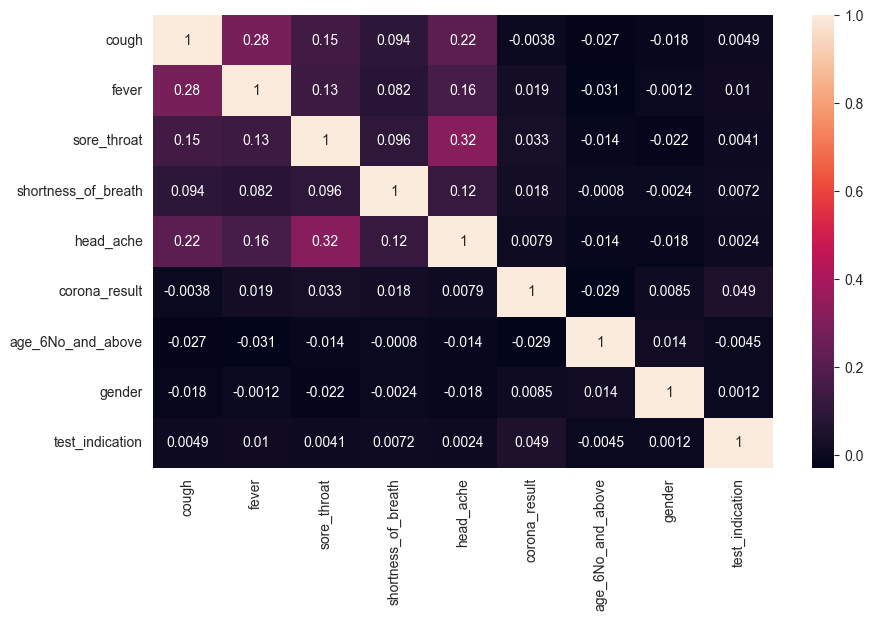

In [27]:
sns.heatmap(df.corr(),annot=True);

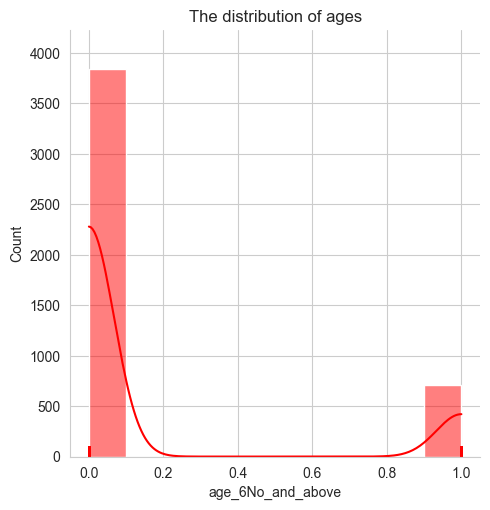

In [28]:
corona_pre= df[df.corona_result==1]
ax =sns.displot(corona_pre.age_6No_and_above,rug=True,color="red",bins=10,kde=True)
plt.title("The distribution of ages")
plt.show()

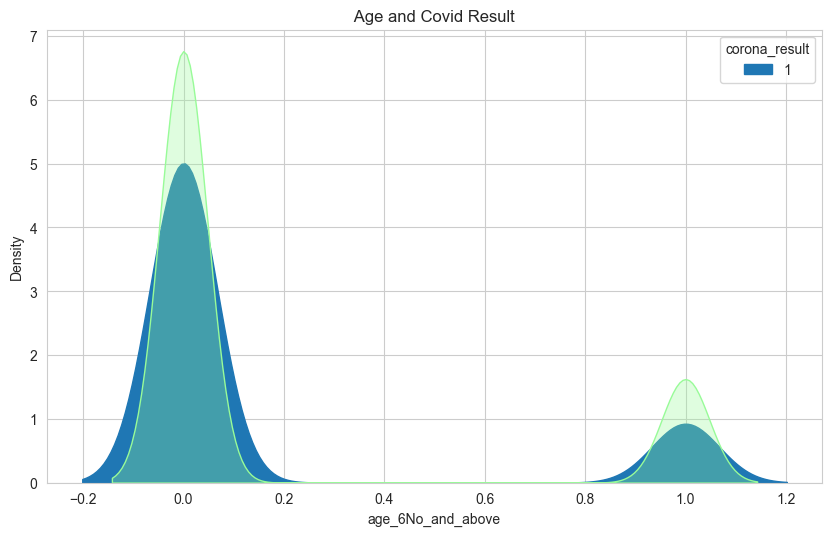

In [29]:
fig1 =plt.figure()
ax1 =fig1.add_subplot(1,1,1)
plt.title(" Age and Covid Result ")
sns.kdeplot(data=df[df.corona_result==1],x='age_6No_and_above',hue ="corona_result",fill =True,ax =ax1,color='coral',alpha=1)
sns.kdeplot(data=df[df.corona_result==0],x='age_6No_and_above',fill=True,ax =ax1,color ='palegreen',alpha=0.3);

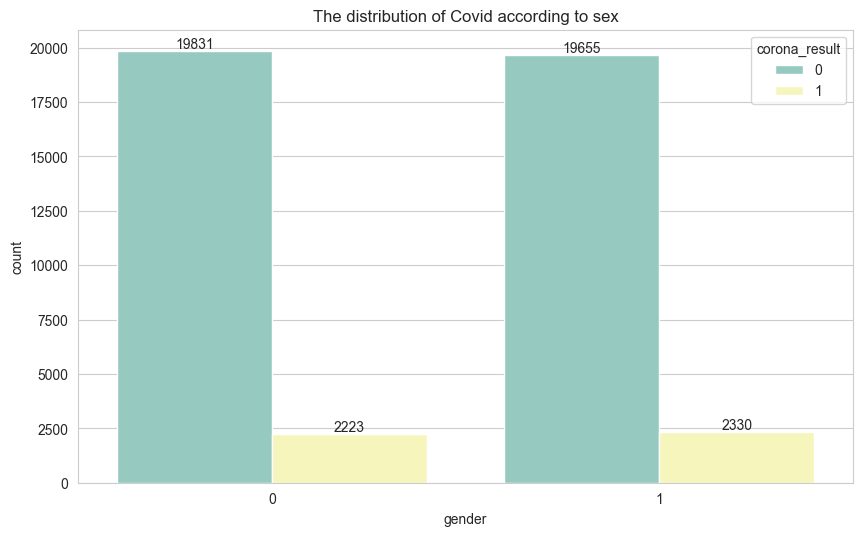

In [30]:
ax =sns.countplot(x=df.gender,hue=df.corona_result,palette ="Set3")
plt.title("The distribution of Covid according to sex")
for p in ax.containers:
    ax.bar_label(p)

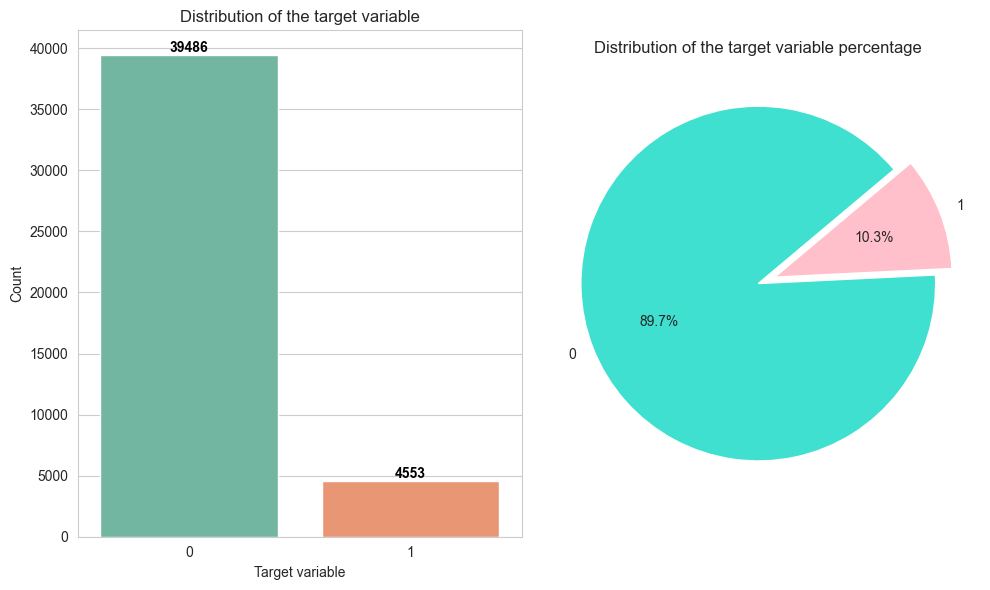

In [31]:
plt.subplot(1,2,1)
ax = sns.countplot(x='corona_result', data=df, palette="Set2")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=10, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.corona_result.value_counts(), labels = df.corona_result.value_counts().index, autopct = '%1.1f%%', startangle = 40, explode = (0, 0.1), colors = ['turquoise', 'pink'] )
plt.title('Distribution of the target variable percentage')
plt.tight_layout()
plt.show()

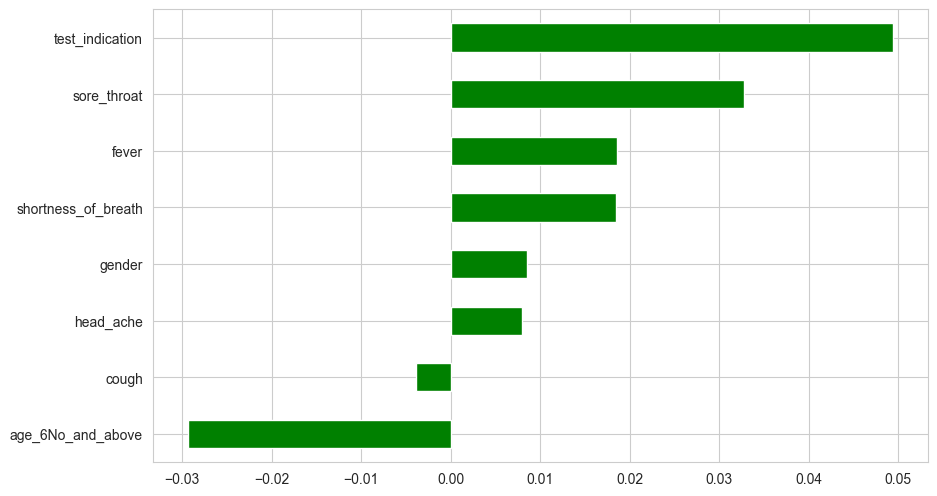

In [32]:
df.corr()['corona_result'].sort_values().drop('corona_result').plot(kind = 'barh', color="green");

### Decision Tree classifier

In [33]:
y =df.corona_result
features=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
        'age_6No_and_above', 'gender', 'test_indication']
X=df[features]

In [34]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(criterion="entropy")

dtc2 =DecisionTreeClassifier(criterion="gini")

model1 = dtc1.fit(train_X, train_y)

y_pred1 = model1.predict(val_X)

print("Entropy: ",accuracy_score(val_y, y_pred1))

model2 = dtc2.fit(train_X, train_y)

y_pred2 = model2.predict(val_X)

print("Gini: ",accuracy_score(val_y, y_pred2))

Entropy:  0.8957311534968211
Gini:  0.8956403269754768


In [35]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from yellowbrick.classifier import PrecisionRecallCurve

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Entropy")

cm = confusion_matrix(val_y,y_pred1)
print(cm)

cr = classification_report(val_y, y_pred1)
print(cr)

Entropy
[[9862    0]
 [1148    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      9862
           1       0.00      0.00      0.00      1148

    accuracy                           0.90     11010
   macro avg       0.45      0.50      0.47     11010
weighted avg       0.80      0.90      0.85     11010



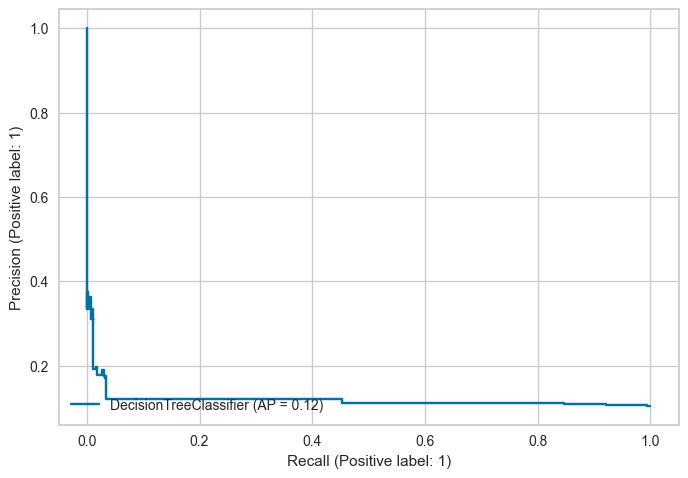

In [37]:
plot_precision_recall_curve(dtc1, val_X, val_y);

In [38]:
print("Gini")

cm = confusion_matrix(val_y,y_pred2)
print(cm)

cr = classification_report(val_y, y_pred2)
print(cr)

Gini
[[9861    1]
 [1148    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      9862
           1       0.00      0.00      0.00      1148

    accuracy                           0.90     11010
   macro avg       0.45      0.50      0.47     11010
weighted avg       0.80      0.90      0.85     11010



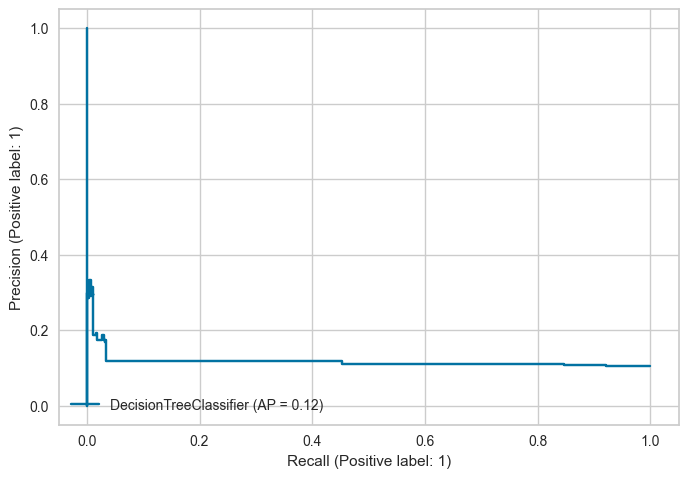

In [39]:
plot_precision_recall_curve(dtc2, val_X, val_y);